In [1]:
Question 7: KNN Classifier Assignment: Wine Dataset Analysis with
Optimization
Task:
1. Load the Wine dataset (sklearn.datasets.load_wine()).
2. Split data into 70% train and 30% test.
3. Train a KNN classifier (default K=5) without scaling and evaluate using:
a. Accuracy
b. Precision, Recall, F1-Score (print classification report)
4. Apply StandardScaler, retrain KNN, and compare metrics.
5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
(Euclidean, Manhattan).
6. Train the optimized KNN and compare results with the unscaled/scaled versions.

Program =>

# Import necessary libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Load the Wine dataset
data = load_wine()
X, y = data.data, data.target

# 2. Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 3. Train KNN (default K=5) without scaling
knn_default = KNeighborsClassifier(n_neighbors=5)
knn_default.fit(X_train, y_train)
y_pred_default = knn_default.predict(X_test)

# Evaluate performance
print("=== KNN Without Scaling ===")
print("Accuracy:", accuracy_score(y_test, y_pred_default))
print("Classification Report:\n", classification_report(y_test, y_pred_default))

# 4. Apply StandardScaler and retrain KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

print("\n=== KNN With Standard Scaling ===")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("Classification Report:\n", classification_report(y_test, y_pred_scaled))

# 5. Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("\n=== Grid Search Results ===")
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# 6. Train optimized KNN
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)

print("\n=== Optimized KNN Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))


=== KNN Without Scaling ===
Accuracy: 0.7222222222222222
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54


=== KNN With Standard Scaling ===
Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54


=== Grid Search Results ===
Best Parameters: {'metric': 'euclidean',

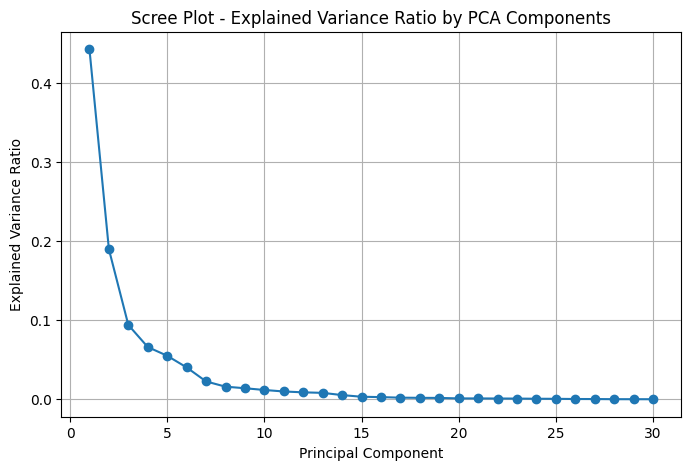

Original feature count: 30
Reduced feature count after PCA (95% variance): 10

=== Model Accuracy Comparison ===
Original Data Accuracy: 0.9708
PCA-Reduced Data Accuracy (95% variance): 0.9474


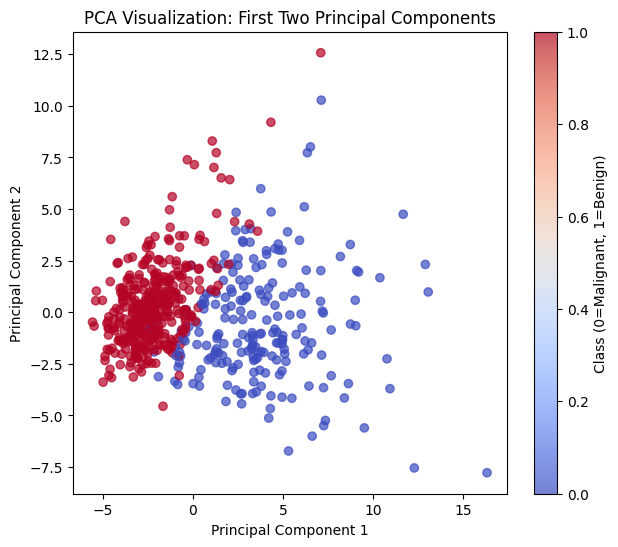

In [2]:
Question 8 : PCA + KNN with Variance Analysis and Visualization
Task:
1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
2. Apply PCA and plot the scree plot (explained variance ratio).
3. Retain 95% variance and transform the dataset.
4. Train KNN on the original data and PCA-transformed data, then compare
accuracy.
5. Visualize the first two principal components using a scatter plot (color by class).

Program =>

# Import libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# 2. Apply StandardScaler before PCA (important for equal feature influence)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA
pca = PCA()
X_pca_full = pca.fit_transform(X_scaled)

# Scree Plot – Explained Variance Ratio
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_, marker='o')
plt.title("Scree Plot - Explained Variance Ratio by PCA Components")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()

# 4. Retain 95% variance
pca_95 = PCA(0.95)
X_pca_95 = pca_95.fit_transform(X_scaled)

print("Original feature count:", X.shape[1])
print("Reduced feature count after PCA (95% variance):", X_pca_95.shape[1])

# 5. Split Data (Train-Test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)
X_train_pca, X_test_pca = train_test_split(X_pca_95, test_size=0.3, random_state=42, stratify=y)

# 6. Train KNN on Original Data
knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train, y_train)
y_pred_orig = knn_original.predict(X_test)
acc_orig = accuracy_score(y_test, y_pred_orig)

# 7. Train KNN on PCA-Reduced Data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

# 8. Compare Accuracy
print("\n=== Model Accuracy Comparison ===")
print(f"Original Data Accuracy: {acc_orig:.4f}")
print(f"PCA-Reduced Data Accuracy (95% variance): {acc_pca:.4f}")

# 9. Visualization – First Two Principal Components
plt.figure(figsize=(7,6))
plt.scatter(X_pca_full[:,0], X_pca_full[:,1], c=y, cmap='coolwarm', alpha=0.7)
plt.title("PCA Visualization: First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Class (0=Malignant, 1=Benign)')
plt.show()


=== Distance Metric Comparison (K=5) ===
Euclidean Distance MSE : 4837.0363
Manhattan Distance MSE : 5428.5875


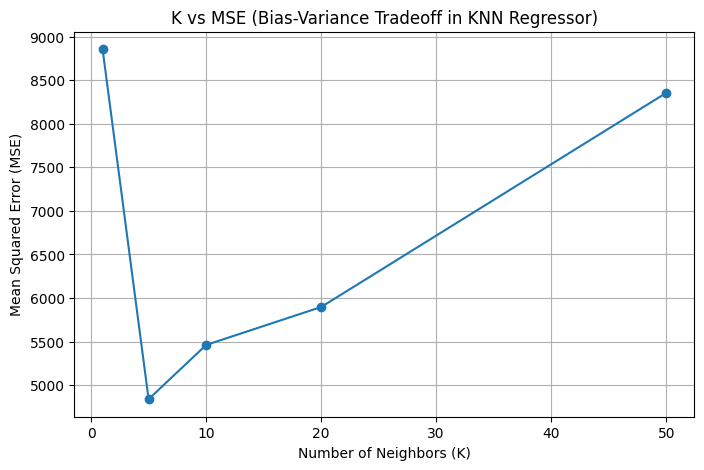


Optimal K based on MSE: 5


In [3]:
Question 9:KNN Regressor with Distance Metrics and K-Value
Analysis
Task:
1. Generate a synthetic regression dataset
(sklearn.datasets.make_regression(n_samples=500, n_features=10)).
2. Train a KNN regressor with:
a. Euclidean distance (K=5)
b. Manhattan distance (K=5)
c. Compare Mean Squared Error (MSE) for both.
3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.

Program =>

# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# 1. Generate a synthetic regression dataset
X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)

# Split into train-test (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling (important for distance-based models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2a. Train KNN Regressor with Euclidean distance (default metric)
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train_scaled, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test_scaled)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)

# 2b. Train KNN Regressor with Manhattan distance
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train_scaled, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

print("=== Distance Metric Comparison (K=5) ===")
print(f"Euclidean Distance MSE : {mse_euclidean:.4f}")
print(f"Manhattan Distance MSE : {mse_manhattan:.4f}")

# 3. Test different K values to analyze bias-variance tradeoff
k_values = [1, 5, 10, 20, 50]
mse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plot K vs MSE
plt.figure(figsize=(8,5))
plt.plot(k_values, mse_values, marker='o')
plt.title("K vs MSE (Bias-Variance Tradeoff in KNN Regressor)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.show()

# Identify optimal K (lowest MSE)
optimal_k = k_values[np.argmin(mse_values)]
print(f"\nOptimal K based on MSE: {optimal_k}")


Dataset shape: (768, 9)
Missing values before imputation:
 Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Missing values after imputation:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

=== Comparison of KNN Algorithms ===
BRUTE      | Accuracy: 0.7446 | Training Time: 0.0185 sec
KD_TREE    | Accuracy: 0.7446 | Training Time: 0.0180 sec
BALL_TREE  | Accuracy: 0.7446 | Training Time: 0.0165 sec

Best Performing Method: BRUTE


<Figure size 700x600 with 0 Axes>

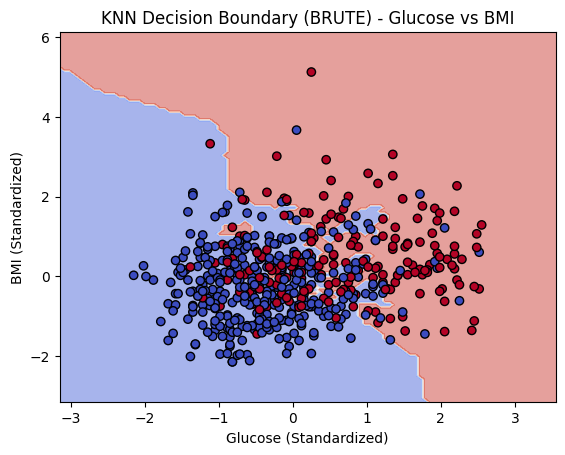

In [4]:
Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World
Data
Task:
1. Load the Pima Indians Diabetes dataset (contains missing values).
2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
3. Train KNN using:
a. Brute-force method
b. KD-Tree
c. Ball Tree
4. Compare their training time and accuracy.
5. Plot the decision boundary for the best-performing method (use 2 most important
features).
Dataset: Pima Indians Diabetes

Program =>

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay

# 1. Load the Pima Indians Diabetes dataset
# (If not available, use online source from UCI)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
cols = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI",
        "DiabetesPedigreeFunction","Age","Outcome"]
data = pd.read_csv(url, names=cols)

print("Dataset shape:", data.shape)
print("Missing values before imputation:\n", (data == 0).sum())

# Some columns can't be zero biologically → replace 0 with NaN
cols_with_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
data[cols_with_missing] = data[cols_with_missing].replace(0, np.nan)

# 2. KNN Imputation for missing values
imputer = KNNImputer(n_neighbors=5)
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

print("\nMissing values after imputation:\n", data_imputed.isnull().sum())

# 3. Split features and target
X = data_imputed.drop("Outcome", axis=1)
y = data_imputed["Outcome"]

# Train-test split (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Feature scaling (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train KNN with different algorithms and compare time + accuracy
methods = ['brute', 'kd_tree', 'ball_tree']
results = {}

for method in methods:
    start = time.time()
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=method)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    end = time.time()

    acc = accuracy_score(y_test, y_pred)
    runtime = end - start
    results[method] = {"Accuracy": acc, "Time": runtime}

# Display results
print("\n=== Comparison of KNN Algorithms ===")
for method, metrics in results.items():
    print(f"{method.upper():<10} | Accuracy: {metrics['Accuracy']:.4f} | Training Time: {metrics['Time']:.4f} sec")

# 5. Identify best-performing method
best_method = max(results, key=lambda m: results[m]["Accuracy"])
print(f"\nBest Performing Method: {best_method.upper()}")

# 6. Plot Decision Boundary using top 2 important features
# For simplicity, use Glucose and BMI (highly correlated with diabetes)
features = ["Glucose", "BMI"]
X_vis = data_imputed[features]
y_vis = data_imputed["Outcome"]

# Split & scale again for 2D plotting
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X_vis, y_vis, test_size=0.3, random_state=42, stratify=y_vis)
scaler2 = StandardScaler()
X_train_v_scaled = scaler2.fit_transform(X_train_v)
X_test_v_scaled = scaler2.transform(X_test_v)

knn_best = KNeighborsClassifier(n_neighbors=5, algorithm=best_method)
knn_best.fit(X_train_v_scaled, y_train_v)

# Plot decision boundary
plt.figure(figsize=(7,6))
DecisionBoundaryDisplay.from_estimator(knn_best, X_train_v_scaled, response_method="predict",
                                       cmap='coolwarm', alpha=0.5)
plt.scatter(X_train_v_scaled[:,0], X_train_v_scaled[:,1], c=y_train_v, cmap='coolwarm', edgecolor='k')
plt.title(f"KNN Decision Boundary ({best_method.upper()}) - Glucose vs BMI")
plt.xlabel("Glucose (Standardized)")
plt.ylabel("BMI (Standardized)")
plt.show()


Question 1 : What is the fundamental idea behind ensemble techniques? How does
bagging differ from boosting in terms of approach and objective?

Answer: The fundamental idea behind ensemble techniques is to combine multiple individual models (called weak learners) to create a single, more powerful model that performs better than any of the individual models alone. The goal is to reduce variance, bias, or improve prediction accuracy by leveraging the collective intelligence of multiple models.

Difference Between Bagging and Boosting

1. Bagging (Bootstrap Aggregating)

* Approach => Builds multiple independent models in parallel using random subsets of data (sampled with replacement).
* Objective => Reduces variance and helps prevent overfitting.

2. Boosting

* Approach => Builds models sequentially, where each new model focuses on correcting the errors made by the previous ones.
* Objective => Reduces bias and improves weak learners by focusing on difficult-to-predict instances.

Question 2: Explain how the Random Forest Classifier reduces overfitting compared to
a single decision tree. Mention the role of two key hyperparameters in this process.

Answer: A Random Forest Classifier reduces overfitting compared to a single decision tree by building an ensemble of multiple decision trees and combining their predictions through majority voting (for classification) or averaging (for regression).
A single decision tree tends to memorize the training data and capture noise, leading to high variance and poor generalization. Random Forest tackles this by introducing randomness in two ways — in data sampling and feature selection — ensuring that each tree learns slightly different patterns. This diversity among trees helps smooth out individual errors and significantly reduces overfitting.

How It Reduces Overfitting

1. Bootstrap Sampling (Bagging):
Each tree is trained on a random subset of the data (with replacement). This ensures trees are exposed to different samples, reducing the likelihood that all trees overfit the same noise.

2. Random Feature Selection:
When splitting nodes, only a random subset of features is considered. This prevents dominant features from dictating every tree’s structure, increasing diversity and lowering correlation among trees.

Question 3: What is Stacking in ensemble learning? How does it differ from traditional
bagging/boosting methods? Provide a simple example use case.

Answer: Stacking (Stacked Generalization) is an ensemble learning technique that combines multiple different models (called base learners) and uses another model (called a meta-learner or blender) to learn how to best combine their predictions.
Instead of simply averaging predictions like bagging or sequentially correcting errors like boosting, stacking learns how to optimally mix the strengths of various models.

How Stacking Works

1. Level-0 (Base Models):
Several different models (e.g., Decision Tree, Logistic Regression, SVM, etc.) are trained on the same dataset.

2. Level-1 (Meta Model):
The predictions from all base models are used as input features to train a higher-level model (meta-learner) that learns how to combine them for the best final prediction.

Difference Between Stacking and Bagging/Boosting

1.Stacking
* Model Relationship => Combines different types of models.
* Combination Method => Learns combination using a meta-learner.
* Goal => Exploit strengths of diverse algorithms.
* Dependency => Meta-learner depends on base models’ outputs.

2. Bagging
* Model Relationship => Uses same type of models trained independently.
* Combination Method => Combines predictions by averaging or voting.
* Goal => Reducing variance.
* Dependency => Models are independent.

3. Boosting
* Model Relationship => Uses same type of models trained sequentially.
* Combines Method => Combines models by weighted sum (later models focus on errors).
* Goal => Reduce bias.
* Dependency => Models are dependent (sequential training).

Example Use Case

Suppose you are predicting whether an email is spam or not.
You can:

* Use Logistic Regression, Random Forest, and SVM as base learners.

* Feed their predictions into a meta-model like Gradient Boosting or another Logistic Regression model.
The meta-model learns how to weight each model’s output — e.g., trusting Random Forest more when words are frequent, and SVM more when the email length is unusual.

Question 4:What is the OOB Score in Random Forest, and why is it useful? How does
it help in model evaluation without a separate validation set?

Answer: The OOB (Out-of-Bag) Score in a Random Forest is an internal validation metric that estimates how well the model generalizes to unseen data — without needing a separate validation or test set.
It leverages the bootstrap sampling process used in Random Forests, where each tree is trained on a random subset of the data (sampled with replacement). As a result, about one-third (~33%) of the data is not included in the training sample for each tree — these are called Out-of-Bag (OOB) samples.

How OOB Score Works

1. For each tree, the samples not used during its training (OOB samples) are passed through that tree to get predictions.
2. Each data point serves as OOB data for several trees.
3. The model aggregates the predictions for each sample from all trees where it was OOB.
4. The OOB Score is then calculated as the accuracy (or another metric) between these aggregated predictions and the true labels.

Why It’s Useful

* No Need for a Separate Validation Set:
Since the OOB data acts like an internal test set, it provides an unbiased performance estimate — saving data that would otherwise be split for validation.
* Built-In Cross-Validation:
Every data point is tested on multiple trees it was not trained on, making OOB scoring similar to performing cross-validation but more efficient.
* Helps Detect Overfitting:
A large gap between training accuracy and OOB score signals overfitting.

Question 5: Compare AdaBoost and Gradient Boosting in terms of:
● How they handle errors from weak learners
● Weight adjustment mechanism
● Typical use cases

Answer: Both AdaBoost (Adaptive Boosting) and Gradient Boosting are boosting algorithms that build an ensemble of weak learners (usually decision trees) sequentially, where each new model focuses on correcting the mistakes of the previous ones.
However, they differ in how they handle errors and how they update weights.

Comparison Between AdaBoost and Gradient Boosting

1. AdaBoost
* Handling Errors from Weak Learners:- Focuses more on misclassified samples by increasing their weights, forcing the next learner to pay extra attention to them.
* Weight Adjustment mechanism:-
 - Assigns higher weights to misclassified samples after each iteration.

- Learners are weighted based on their accuracy — better learners get more influence in the final prediction.
* Learning Process:- Emphasizes difficult samples directly via sample weighting.  
* Output Combination:- Final prediction is a weighted sum of weak learners.
* Typical Use Cases:- - Simple and fast for classification (especially binary).

- Good when data is clean and not too noisy.

Question 6:Why does CatBoost perform well on categorical features without requiring
extensive preprocessing? Briefly explain its handling of categorical variables.

Answer: CatBoost performs exceptionally well on categorical features because it is specifically designed to handle categorical variables natively, without needing extensive preprocessing like one-hot encoding or label encoding.
It uses statistical encoding techniques that convert categorical values into numerical representations based on target statistics — all while preventing overfitting and data leakage.

How CatBoost Handles Categorical Features

1. Target Statistics (Mean Encoding) with Random Permutations:
* Instead of assigning arbitrary numbers to categories (like label encoding), CatBoost replaces each categorical value with the average target value for that category.
* To prevent data leakage, it doesn’t use the global mean from the entire dataset.
* It processes data in a random order (permutation), and for each row, the encoding is calculated only from previous examples, not the current or future ones.

Example:
Suppose we have a feature City = [Delhi, Mumbai, Delhi, Chennai] and a target y = [1, 0, 1, 0].
CatBoost might encode Delhi based on the average target value of previous rows where City == Delhi, not the entire column.


2. Combination of Categorical Features:
* CatBoost automatically generates combinations of categorical features (e.g., “City + Job Type”) to capture complex interactions.
* These combinations help improve accuracy without manual feature engineering.

3. Efficient Handling in Trees:
* During tree building, CatBoost uses ordered target statistics and symmetric tree structures, ensuring balanced splits and reduced overfitting.

Why It Performs Well

* No manual encoding → saves preprocessing time and avoids high-dimensional sparse data.
* Prevents target leakage through ordered statistics.
* Captures non-linear relationships between categories effectively.


















































